In [112]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [113]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [114]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [115]:
# Load training data
train_img = load_dataset(train_dir)
# Load test data
test_img = load_dataset(test_dir)

In [116]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [117]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

In [118]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [119]:
# pra pengolahan data pada data training
train_std_img_list  = preprocess(train_img)
# pra pengolahan data pada data test
test_std_img_list  = preprocess(test_img)

In [120]:
# Fungsi untuk menghitung histogram dari gambar
def extract_histogram(image, bins=(8, 8, 8)):
    # Mengonversi gambar dari RGB ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Ekstraksi histogram warna dengan jumlah bins yang ditentukan untuk setiap channel H, S, V
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    # Normalisasi histogram agar nilai berada dalam rentang [0, 1]
    cv2.normalize(hist, hist)
    # Mengubah histogram menjadi vektor 1D untuk digunakan sebagai fitur
    return hist.flatten()


In [121]:
# Fungsi untuk memuat dataset dari direktori gambar
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')  # Mendapatkan daftar subdirektori (day dan night)

    img_list = []

    for dir in dirs:
        # Mendapatkan label dari nama folder (day atau night)
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            # Membaca gambar menggunakan matplotlib
            img = mpimg.imread(file)
            # Memastikan gambar berhasil dibaca
            if img is not None:
                # Menambahkan tuple (gambar, label) ke dalam list
                img_list.append((img, label))
    
    return img_list

In [122]:
# Fungsi untuk mengekstrak fitur histogram dan label dari dataset
def extract_features(img_list):
    features = []
    labels = []

    for img, label in img_list:
        # Ekstraksi histogram dari gambar sebagai fitur
        hist = extract_histogram(img)
        # Menambahkan fitur histogram ke dalam list fitur
        features.append(hist)
        # Menambahkan label ke dalam list label
        labels.append(label)

    return np.array(features), np.array(labels)

In [123]:
# Fungsi untuk menampilkan histogram gambar
def plot_histogram(image, pick_number):
    # Mengonversi gambar ke ruang warna HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Menghitung histogram untuk channel H, S, dan V
    hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    
    # Menampilkan histogram untuk masing-masing channel
    print(f'Image {pick_number}')
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.plot(hist_h, color='r')
    plt.title('Histogram Hue (H)')
    
    plt.subplot(1, 3, 2)
    plt.plot(hist_s, color='g')
    plt.title('Histogram Saturation (S)')
    
    plt.subplot(1, 3, 3)
    plt.plot(hist_v, color='b')
    plt.title('Histogram Value (V)')
    
    plt.show()

In [124]:
# Ekstraksi fitur dan label dari data training dan testing
X_train, y_train = extract_features(train_std_img_list)
X_test, y_test = extract_features(test_std_img_list)

Image 15


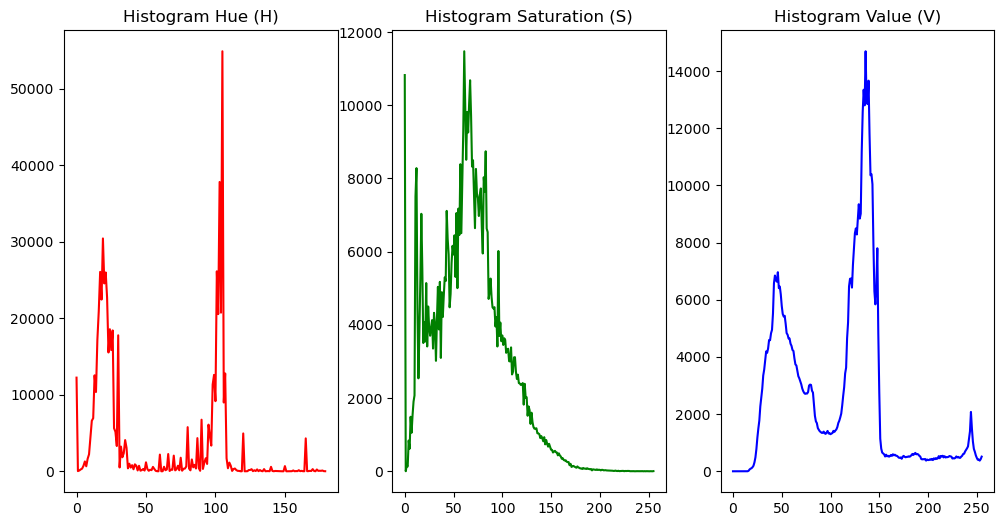

In [125]:
# Histogram pada salah satu gambar di dataset
rand_num = np.random.randint(0, len(train_std_img_list))

example_image, example_label = train_std_img_list[rand_num][0], train_std_img_list[rand_num][1]
plot_histogram(example_image, rand_num)

In [126]:
# Normalisasi fitur menggunakan StandardScaler agar data memiliki mean=0 dan standar deviasi=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
# Melatih model SVM menggunakan data training
model = SVC()
model.fit(X_train, y_train)

SVC()

In [128]:
# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 1.0
Accuracy on test: 0.89375
